In [2]:
import pandas as pd

In [3]:
url = "https://www.football-data.co.uk/new/POL.csv"
df = pd.read_csv(url)

df.head()


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Poland,Ekstraklasa,2012/2013,17/08/2012,17:00,Pogon Szczecin,Zaglebie,4,0,H,3.23,3.21,2.47,3.30,3.30,2.50,3.01,3.11,2.34
1,Poland,Ekstraklasa,2012/2013,17/08/2012,19:30,Piast Gliwice,Gornik Z.,1,2,A,2.72,3.12,2.98,2.78,3.25,3.30,2.56,3.05,2.78
2,Poland,Ekstraklasa,2012/2013,18/08/2012,12:30,Jagiellonia,Podbeskidzie,2,1,H,1.74,3.60,5.63,1.85,3.60,5.63,1.74,3.42,4.72
3,Poland,Ekstraklasa,2012/2013,18/08/2012,14:45,Widzew Lodz,Slask Wroclaw,2,1,H,2.70,3.11,2.95,2.80,3.20,2.95,2.66,3.03,2.66
4,Poland,Ekstraklasa,2012/2013,18/08/2012,17:00,Lech Poznan,Ruch,4,0,H,2.12,3.29,3.89,2.12,3.30,4.00,2.05,3.16,3.61


In [4]:
df_2324 = df[df['Season'] == '2023/2024'][['Home', 'Away', 'HG', 'AG', 'Date']]

In [5]:
df_2324_json = df_2324.to_json(orient='records')


In [6]:
df_2324_json

'[{"Home":"Warta Poznan","Away":"Pogon Szczecin","HG":0,"AG":1,"Date":"21\\/07\\/2023"},{"Home":"Legia","Away":"LKS Lodz","HG":3,"AG":0,"Date":"21\\/07\\/2023"},{"Home":"Stal Mielec","Away":"Cracovia","HG":2,"AG":2,"Date":"22\\/07\\/2023"},{"Home":"Rakow","Away":"Jagiellonia","HG":3,"AG":0,"Date":"22\\/07\\/2023"},{"Home":"Piast Gliwice","Away":"Lech Poznan","HG":1,"AG":2,"Date":"22\\/07\\/2023"},{"Home":"Gornik Zabrze","Away":"Radomiak Radom","HG":0,"AG":2,"Date":"23\\/07\\/2023"},{"Home":"Zaglebie","Away":"Ruch Chorzow","HG":2,"AG":1,"Date":"23\\/07\\/2023"},{"Home":"Widzew Lodz","Away":"Puszcza","HG":3,"AG":2,"Date":"23\\/07\\/2023"},{"Home":"Korona Kielce","Away":"Slask Wroclaw","HG":1,"AG":1,"Date":"24\\/07\\/2023"},{"Home":"Ruch Chorzow","Away":"LKS Lodz","HG":2,"AG":0,"Date":"28\\/07\\/2023"},{"Home":"Warta Poznan","Away":"Gornik Zabrze","HG":2,"AG":0,"Date":"29\\/07\\/2023"},{"Home":"Jagiellonia","Away":"Puszcza","HG":4,"AG":1,"Date":"29\\/07\\/2023"},{"Home":"Slask Wroclaw","A

In [7]:
df_2324_json[0:3]

'[{"'

In [8]:
import json

data = json.loads(df_2324_json)

data


[{'Home': 'Warta Poznan',
  'Away': 'Pogon Szczecin',
  'HG': 0,
  'AG': 1,
  'Date': '21/07/2023'},
 {'Home': 'Legia', 'Away': 'LKS Lodz', 'HG': 3, 'AG': 0, 'Date': '21/07/2023'},
 {'Home': 'Stal Mielec',
  'Away': 'Cracovia',
  'HG': 2,
  'AG': 2,
  'Date': '22/07/2023'},
 {'Home': 'Rakow',
  'Away': 'Jagiellonia',
  'HG': 3,
  'AG': 0,
  'Date': '22/07/2023'},
 {'Home': 'Piast Gliwice',
  'Away': 'Lech Poznan',
  'HG': 1,
  'AG': 2,
  'Date': '22/07/2023'},
 {'Home': 'Gornik Zabrze',
  'Away': 'Radomiak Radom',
  'HG': 0,
  'AG': 2,
  'Date': '23/07/2023'},
 {'Home': 'Zaglebie',
  'Away': 'Ruch Chorzow',
  'HG': 2,
  'AG': 1,
  'Date': '23/07/2023'},
 {'Home': 'Widzew Lodz',
  'Away': 'Puszcza',
  'HG': 3,
  'AG': 2,
  'Date': '23/07/2023'},
 {'Home': 'Korona Kielce',
  'Away': 'Slask Wroclaw',
  'HG': 1,
  'AG': 1,
  'Date': '24/07/2023'},
 {'Home': 'Ruch Chorzow',
  'Away': 'LKS Lodz',
  'HG': 2,
  'AG': 0,
  'Date': '28/07/2023'},
 {'Home': 'Warta Poznan',
  'Away': 'Gornik Zabrz

In [145]:
type(data)

numpy.ndarray

In [9]:
import mezzala

In [10]:
adapter = mezzala.KeyAdapter(
        home_team = 'Home',
        away_team = 'Away',
        home_goals = 'HG',
        away_goals='AG'
    )

adapter.home_team(data[0])

'Warta Poznan'

In [11]:
model = mezzala.DixonColes(adapter=adapter)
model.fit(data)

DixonColes(adapter=KeyAdapter(home_goals='HG', away_goals='AG', home_team='Home', away_team='Away'), blocks=[TeamStrength(), BaseRate(), HomeAdvantage()]), weight=UniformWeight()

In [12]:
match_to_predict = {
    'Home': 'Radomiak Radom',
    'Away': 'Lech Poznan',
}

scorelines = model.predict_one(match_to_predict)

mezzala.scorelines_to_outcomes(scorelines)

{Outcomes('Home win'): OutcomePrediction(outcome=Outcomes('Home win'), probability=0.3875480894806151),
 Outcomes('Draw'): OutcomePrediction(outcome=Outcomes('Draw'), probability=0.280781125604639),
 Outcomes('Away win'): OutcomePrediction(outcome=Outcomes('Away win'), probability=0.3316707849147463)}

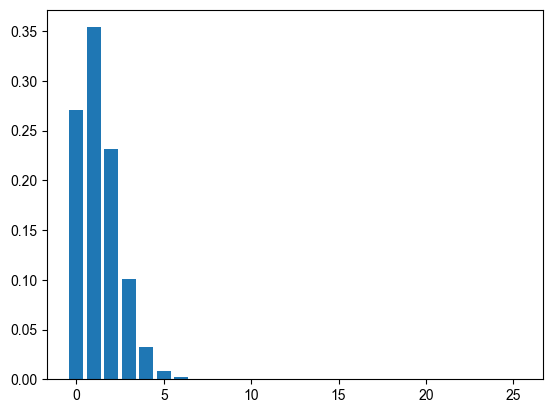

In [141]:
from collections import defaultdict

home_goal_probabilities = defaultdict(float)

for scoreline in scorelines:
    home_goal = scoreline.away_goals
    probability = scoreline.probability
    home_goal_probabilities[home_goal] += probability

home_goal_probabilities

#create a simple plot from home_goal_probabilities
import matplotlib.pyplot as plt
plt.bar(home_goal_probabilities.keys(), home_goal_probabilities.values())
plt.show()



In [144]:
total_probability = 0

for scoreline in scorelines:
    if scoreline.home_goals == 0:
        total_probability += scoreline.probability

total_probability



0.23962663428918485

In [142]:
import numpy as np

# Simulate the game 1000 times
simulations = 1000
total_goals = 0

for _ in range(simulations):
    # Randomly select a goal value based on probabilities
    goals = np.random.choice(list(home_goal_probabilities.keys()), p=list(home_goal_probabilities.values()))
    total_goals += goals

# Calculate the average expected goal
average_goals = total_goals / simulations

average_goals


1.263

In [13]:
filtered_scorelines = [scoreline for scoreline in scorelines if scoreline.home_goals <= 5 and scoreline.away_goals <= 5]
filtered_scorelines


[ScorelinePrediction(home_goals=0, away_goals=0, probability=0.07741657423522526),
 ScorelinePrediction(home_goals=0, away_goals=1, probability=0.07222183162362664),
 ScorelinePrediction(home_goals=0, away_goals=2, probability=0.055380312969072365),
 ScorelinePrediction(home_goals=0, away_goals=3, probability=0.02412110781226845),
 ScorelinePrediction(home_goals=0, away_goals=4, probability=0.007879530796656991),
 ScorelinePrediction(home_goals=0, away_goals=5, probability=0.0020591759237156555),
 ScorelinePrediction(home_goals=1, away_goals=0, probability=0.0801370125507119),
 ScorelinePrediction(home_goals=1, away_goals=1, probability=0.1336473761864953),
 ScorelinePrediction(home_goals=1, away_goals=2, probability=0.07912037212783493),
 ScorelinePrediction(home_goals=1, away_goals=3, probability=0.034461181671329846),
 ScorelinePrediction(home_goals=1, away_goals=4, probability=0.011257274930396261),
 ScorelinePrediction(home_goals=1, away_goals=5, probability=0.0029418895745866695)

In [14]:
sorted_scorelines = sorted(filtered_scorelines, key=lambda x: x.probability, reverse=True)
sorted_scorelines


[ScorelinePrediction(home_goals=1, away_goals=1, probability=0.1336473761864953),
 ScorelinePrediction(home_goals=2, away_goals=1, probability=0.0865083717598177),
 ScorelinePrediction(home_goals=1, away_goals=0, probability=0.0801370125507119),
 ScorelinePrediction(home_goals=1, away_goals=2, probability=0.07912037212783493),
 ScorelinePrediction(home_goals=0, away_goals=0, probability=0.07741657423522526),
 ScorelinePrediction(home_goals=0, away_goals=1, probability=0.07222183162362664),
 ScorelinePrediction(home_goals=2, away_goals=0, probability=0.06620564776419381),
 ScorelinePrediction(home_goals=2, away_goals=2, probability=0.056518579889057834),
 ScorelinePrediction(home_goals=0, away_goals=2, probability=0.055380312969072365),
 ScorelinePrediction(home_goals=3, away_goals=1, probability=0.04119739909278038),
 ScorelinePrediction(home_goals=1, away_goals=3, probability=0.034461181671329846),
 ScorelinePrediction(home_goals=3, away_goals=0, probability=0.03152874615083708),
 Sco

In [15]:
import numpy as np

array_5x5 = np.zeros((6, 6))

for scoreline in filtered_scorelines:
    home_goals = scoreline.home_goals
    away_goals = scoreline.away_goals
    probability = scoreline.probability
    array_5x5[home_goals, away_goals] = probability

array_5x5


array([[7.74165742e-02, 7.22218316e-02, 5.53803130e-02, 2.41211078e-02,
        7.87953080e-03, 2.05917592e-03],
       [8.01370126e-02, 1.33647376e-01, 7.91203721e-02, 3.44611817e-02,
        1.12572749e-02, 2.94188957e-03],
       [6.62056478e-02, 8.65083718e-02, 5.65185799e-02, 2.46168843e-02,
        8.04148382e-03, 2.10149948e-03],
       [3.15287462e-02, 4.11973991e-02, 2.69155279e-02, 1.17231614e-02,
        3.82955096e-03, 1.00078537e-03],
       [1.12610691e-02, 1.47144056e-02, 9.61337372e-03, 4.18714181e-03,
        1.36779426e-03, 3.57448823e-04],
       [3.21767766e-03, 4.20441555e-03, 2.74687399e-03, 1.19641151e-03,
        3.90826217e-04, 1.02135515e-04]])

In [16]:
array_5x5 = np.round(array_5x5 * 100, decimals=2)
array_5x5


array([[7.740e+00, 7.220e+00, 5.540e+00, 2.410e+00, 7.900e-01, 2.100e-01],
       [8.010e+00, 1.336e+01, 7.910e+00, 3.450e+00, 1.130e+00, 2.900e-01],
       [6.620e+00, 8.650e+00, 5.650e+00, 2.460e+00, 8.000e-01, 2.100e-01],
       [3.150e+00, 4.120e+00, 2.690e+00, 1.170e+00, 3.800e-01, 1.000e-01],
       [1.130e+00, 1.470e+00, 9.600e-01, 4.200e-01, 1.400e-01, 4.000e-02],
       [3.200e-01, 4.200e-01, 2.700e-01, 1.200e-01, 4.000e-02, 1.000e-02]])

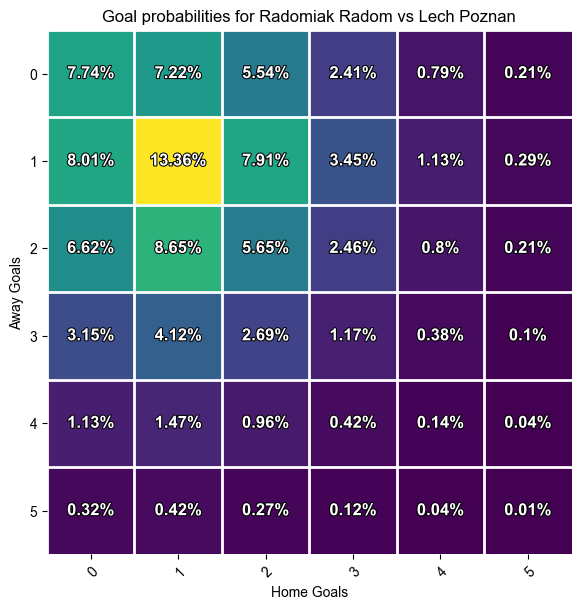

In [132]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(array_5x5, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(len(home_goals)), labels=home_goals)
ax.set_yticks(np.arange(len(away_goals)), labels=away_goals)


ax.set_xticks(np.arange(len(home_goals))-.5, minor=True)
ax.set_yticks(np.arange(len(away_goals))-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)



# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations. Annotations should be white with black borders.
for i in range(len(home_goals)):
    for j in range(len(away_goals)):
        text = ax.text(j, i, f"{array_5x5[i, j]}%",
                       ha="center", va="center", color="white", fontsize=12, fontweight='bold')
        text.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='black')])

ax.set_title(f"Goal probabilities for {match_to_predict['Home']} vs {match_to_predict['Away']}")
fig.tight_layout()

# Set axis labels
ax.set_xlabel('Home Goals')
ax.set_ylabel('Away Goals')

# Set plot background color
ax.set_facecolor('#FDF5F1')

plt.show()


In [91]:
outcomes = mezzala.scorelines_to_outcomes(scorelines)

outcomes

{Outcomes('Home win'): OutcomePrediction(outcome=Outcomes('Home win'), probability=0.3875480894806151),
 Outcomes('Draw'): OutcomePrediction(outcome=Outcomes('Draw'), probability=0.280781125604639),
 Outcomes('Away win'): OutcomePrediction(outcome=Outcomes('Away win'), probability=0.3316707849147463)}

In [92]:
probabilities = [outcome.probability for outcome in outcomes.values()]

print(probabilities)

[0.3875480894806151, 0.280781125604639, 0.3316707849147463]


In [107]:
sum(probabilities)

1.0000000000000004

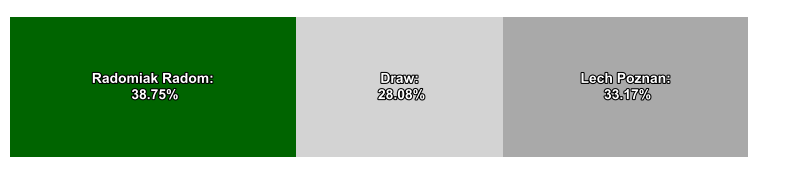

In [130]:
# Define the probabilities
home = [np.round(probabilities[0]*100, decimals=2)]
draw = [np.round(probabilities[1]*100, decimals=2)]
away = [np.round(probabilities[2]*100, decimals=2)]

# Define the x-axis positions for the bars
game = ['Game']

fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(game, home, label={match_to_predict['Home']}, color='darkgreen')
ax.barh(game, draw, left=home, label='Draw', color='lightgray')
ax.barh(game, away, left=[i+j for i,j in zip(home,draw)], label={match_to_predict['Away']}, color='darkgray')

# Remove all the axes
ax.spines[:].set_visible(False)

# Remove the ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove the tick labels
ax.xaxis.set_ticklabels([])

# Remove the y-axis tick labels
ax.yaxis.set_ticklabels([])

# Set bar text to labels and values
for i, (h, d, a) in enumerate(zip(home, draw, away)):
    text1 = ax.text(h/2, i, f"{match_to_predict['Home']}:\n {h}%", color='white', fontweight='bold', ha='center', va='center')
    text2 = ax.text(h+d/2, i, f'Draw:\n {d}%', color='white', fontweight='bold', ha='center', va='center')
    text3 = ax.text(h+d+a/2, i, f"{match_to_predict['Away']}:\n {a}%", color='white', fontweight='bold', ha='center', va='center')
    text1.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='black')])
    text2.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='black')])
    text3.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='black')])

# Display the chart
plt.show()
ax.barh(game, draw, left=home, label='Value 2')
ax.barh(game, away, left=[i+j for i,j in zip(home,draw)], label='Value 3')

#remove all the axes
ax.spines[:].set_visible(False)

#remove the ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#remove the tick labels
ax.xaxis.set_ticklabels([])

#remove the y-axis tick labels
ax.yaxis.set_ticklabels([])

#set bar text to labels and values
for i, v in enumerate(home):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Display the chart
plt.show()

